In [1]:
#heir clust
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
data=pd.read_csv("C:\\Users\\advay\\Downloads\\Assignment 7\\crime_data.csv")

In [3]:
data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
data.shape

(50, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [7]:
df=norm_func(data.iloc[:,1:])

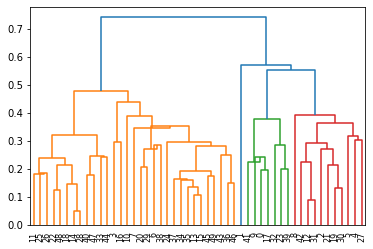

In [8]:
dendrogram=sch.dendrogram(sch.linkage(df,method='centroid'))

In [9]:
#Creating Clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [10]:
y_hc=hc.fit_predict(df)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [11]:
clusters.value_counts()

Clusters
0           20
1           20
2           10
dtype: int64

In [12]:
pd.concat([data,clusters],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [13]:
#DBScan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [14]:
array=data.iloc[:,1:].values

In [15]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [16]:
stdscaler=StandardScaler().fit(array)
x=stdscaler.transform(array)

In [17]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [18]:
dbscan=DBSCAN(eps=0.8,min_samples=4)
dbscan.fit(x)

DBSCAN(eps=0.8, min_samples=4)

In [19]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0],
      dtype=int64)

In [20]:
clust=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [21]:
clust

,Cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [22]:
clust.value_counts()

Cluster
-1         33
 0         17
dtype: int64

In [23]:
pd.concat([data,clust],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [24]:
#Cluster from K-means
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [28]:
model1=KMeans(n_clusters=3)
model1.fit(df)
model.labels_

array([0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0,
       0, 2, 1, 1, 1, 1])

In [29]:
model=pd.Series(model.labels_)
data['Cluster3']=model
df.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [30]:
model

0     0
1     0
2     2
3     0
4     2
5     2
6     1
7     0
8     1
9     1
10    0
11    0
12    2
13    0
14    0
15    2
16    2
17    2
18    2
19    1
20    1
21    2
22    2
23    1
24    2
25    1
26    1
27    1
28    2
29    1
30    1
31    1
32    2
33    1
34    0
35    1
36    1
37    1
38    1
39    0
40    0
41    0
42    2
43    0
44    0
45    2
46    1
47    1
48    1
49    1
dtype: int32

In [31]:
    model.value_counts()

1    21
2    15
0    14
dtype: int64